------------
# Preprocess - Income
- Assume the linear growth of victoria income in future
- Calculate the average income growth rate for each SA2 from 2011 to 2018
- Forecast income for each SA2 from 2020 to 2025
- For data with missing value, the Overall Average annual growth rate of income was used to calculate
- Merge income data and property data with SA2

In [20]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [45]:
income = pd.read_csv("../data/raw/external_data/income_SA2_full.csv")
income

,Unnamed: 0,SA2,SA2 NAME,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,...,2018-19.3,2011-12.4,2012-13.4,2013-14.4,2014-15.4,2015-16.4,2016-17.4,2017-18.4,2018-19.4,Unnamed: 37
0,0,201011001,Alfredton,5098,5372,5760,6225,6718,7124,7558,...,53932,51670,52993,54625,56374,57747,60026,62315,63668,NaN
1,1,201011002,Ballarat,7139,7158,7151,7289,7400,7470,7585,...,53688,61177,63669,65507,67217,72754,71895,74671,77876,NaN
2,2,201011003,Ballarat - North,12073,12063,12261,12503,12516,12889,13356,...,50593,48947,50872,52024,53017,54660,56067,59786,60367,NaN
3,3,201011004,Ballarat - South,11096,11168,11372,11347,11529,11905,12294,...,45828,41918,43625,44722,45473,46143,47676,49041,50778,NaN
4,4,201011005,Buninyong,3828,3878,3897,3966,4001,4118,4195,...,52377,53538,55675,56765,58011,58292,60009,61565,63258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,457,217031476,Otway,2110,2177,2176,2225,2212,2315,2297,...,36219,39331,36936,39769,40640,42426,44236,44755,46448,NaN
458,458,217041477,Moyne - East,3871,3790,3858,3890,3833,3879,3954,...,46071,43776,37883,46722,48627,47031,49104,50652,55573,NaN
459,459,217041478,Moyne - West,5401,5429,5435,5650,5602,5759,5765,...,45256,43420,42511,46053,48280,50307,51459,52080,55547,NaN
460,460,217041479,Warrnambool - North,11528,11577,11780,12185,12346,12694,12950,...,48855,45989,46934,48440,50513,50939,52090,59812,56099,NaN


In [47]:
income.columns

Index(['Unnamed: 0', 'SA2', 'SA2 NAME', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2011-12.1',
       '2012-13.1', '2013-14.1', '2014-15.1', '2015-16.1', '2016-17.1',
       '2017-18.1', '2018-19.1', '2011-12.2', '2012-13.2', '2013-14.2',
       '2014-15.2', '2015-16.2', '2016-17.2', '2017-18.2', '2018-19.2',
       '2011-12.3', '2012-13.3', '2013-14.3', '2014-15.3', '2015-16.3',
       '2016-17.3', '2017-18.3', '2018-19.3', '2011-12.4', '2012-13.4',
       '2013-14.4', '2014-15.4', '2015-16.4', '2016-17.4', '2017-18.4',
       '2018-19.4', 'Unnamed: 37'],
      dtype='object')

In [58]:
income.iloc[:,[2] + [i for i in range(27,35)]]

,SA2 NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3
0,Alfredton,43838,44866,46535,48532,49385,50845,52448,53932
1,Ballarat,42890,45719,47061,47894,49564,50413,51736,53688
2,Ballarat - North,40757,42518,43360,44494,45816,46561,49211,50593
3,Ballarat - South,38360,39436,40106,40846,41544,42531,44293,45828
4,Buninyong,43428,44474,46283,46972,47511,49179,51034,52377
...,...,...,...,...,...,...,...,...,...
457,Otway,31038,28549,30555,31322,33020,32563,33929,36219
458,Moyne - East,36423,32888,38507,40775,40053,41244,44000,46071
459,Moyne - West,37042,36057,38261,39961,41751,42159,43136,45256
460,Warrnambool - North,39265,40642,41775,42635,43536,44772,46945,48855


### Historical Income Data

In [59]:
income_df = pd.read_csv('../data/raw/income_for_suburb.csv')
income_df.head()

,LOC_NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024,2025
0,Abbotsford,50034.0,50558.0,51419.0,53987.0,57501.0,58359.0,61476.0,64090.0,66409.949224,68813.876673,71304.822215,73885.935758,76560.481231,79331.840710,82203.518699
1,Aberfeldie,50458.0,52097.0,53037.0,54683.0,56381.0,56597.0,59116.0,61204.0,62920.085721,64684.288398,66497.957172,68362.479013,70279.279779,72249.825306,74275.622534
2,Aintree,38711.0,39709.0,40111.0,38717.0,39657.0,43924.0,48697.0,51869.0,54142.564367,56515.785463,58993.031525,61578.862259,64278.037238,67095.524658,70036.510488
3,Airport West,45090.0,46837.0,48941.0,50094.0,52329.0,53575.0,55912.0,58506.0,60726.452293,63031.176428,65423.370737,67906.354937,70483.574736,73158.606615,75935.162795
4,Albanvale,38444.0,40266.0,40038.0,41211.0,41238.0,41394.0,43026.0,44383.0,45311.439040,46259.299910,47226.988890,48214.920761,49223.518980,50253.215862,51304.452765


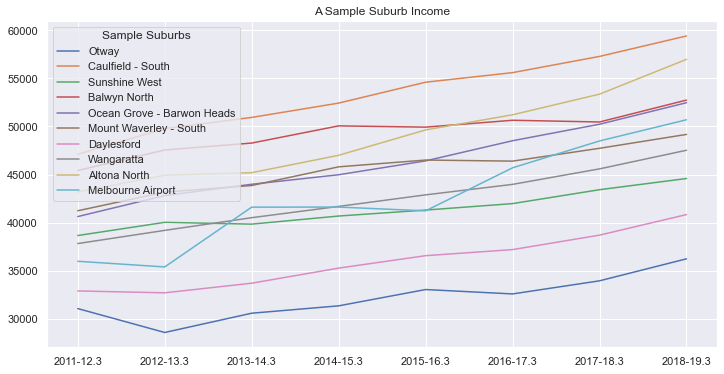

In [80]:
income_df = income.iloc[:,[2] + [i for i in range(27,35)]]
income_df_sample = income_df.sample(n=10, random_state=30034)
income_df_sample.iloc[:, range(1,9)] = income_df_sample.iloc[:, range(1,9)].astype(float)
income_df_sample = income_df_sample.set_index(keys='SA2 NAME', drop=True).transpose()
ax1 = income_df_sample.plot(kind= 'line', title='A Sample Suburb Income', figsize=(12, 6)).legend(loc='upper left')
ax1.set_title('Sample Suburbs')
ax1.get_figure().savefig("../plots/income_sample_1.jpeg")

As the plot demonstrate above, victoria regional income growth in a roughly constant rate, therefore use past average increase rate to predit future income may be a good choice

-----------
### Keep useful features

In [22]:
# Select the features that have to be analyzed by income
income1 = income.iloc[:,np.r_[1:3,27:35]]
income1 = income1.replace("np","0")
income1.iloc[:,2:10] = income1.iloc[:,2:10].astype('int64')
income1

,SA2,SA2 NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3
0,201011001,Alfredton,43838,44866,46535,48532,49385,50845,52448,53932
1,201011002,Ballarat,42890,45719,47061,47894,49564,50413,51736,53688
2,201011003,Ballarat - North,40757,42518,43360,44494,45816,46561,49211,50593
3,201011004,Ballarat - South,38360,39436,40106,40846,41544,42531,44293,45828
4,201011005,Buninyong,43428,44474,46283,46972,47511,49179,51034,52377
...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,31038,28549,30555,31322,33020,32563,33929,36219
458,217041477,Moyne - East,36423,32888,38507,40775,40053,41244,44000,46071
459,217041478,Moyne - West,37042,36057,38261,39961,41751,42159,43136,45256
460,217041479,Warrnambool - North,39265,40642,41775,42635,43536,44772,46945,48855


In [23]:
income1.iloc[:,2:10].describe()

,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,41458.640693,42658.846320,43785.683983,44876.004329,45735.495671,47089.835498,48730.333333,50593.874459
std,8010.027072,8473.907196,8513.283719,8691.038415,9096.970024,7761.463387,8164.455389,8539.373743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37435.500000,38537.500000,39682.000000,40523.000000,41250.750000,41752.750000,43450.000000,45290.250000
50%,41845.500000,43225.500000,44025.500000,45196.000000,46240.000000,46986.500000,48586.500000,50395.500000
75%,45536.250000,47127.250000,47908.250000,49042.250000,50401.250000,51285.250000,52826.250000,54953.250000
max,64531.000000,66270.000000,70174.000000,70023.000000,73408.000000,73296.000000,93272.000000,82813.000000


### Observe the distribution of income each year

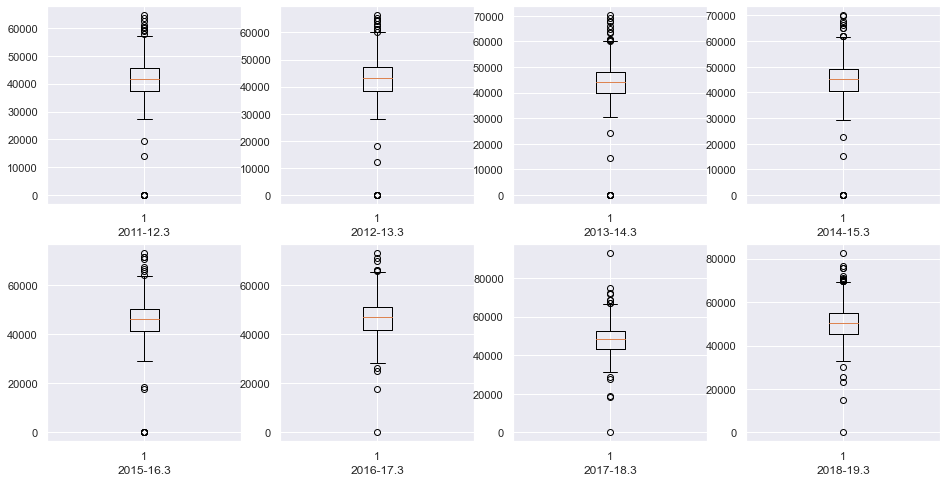

In [24]:
# plot the boxplot of income from 2011 to 2018 (select median according to the distribution)
feature = income1.iloc[:,2:10].columns.values.tolist()

fig, axs = plt.subplots(2, 4, figsize=(16,8))
axs[0,0].boxplot(income1[feature[0]])
axs[0, 0].set_xlabel(feature[0])
axs[0,1].boxplot(income1[feature[1]])
axs[0, 1].set_xlabel(feature[1])
axs[0,2].boxplot(income1[feature[2]])
axs[0, 2].set_xlabel(feature[2])
axs[0,3].boxplot(income1[feature[3]])
axs[0, 3].set_xlabel(feature[3])
axs[1,0].boxplot(income1[feature[4]])
axs[1, 0].set_xlabel(feature[4])
axs[1,1].boxplot(income1[feature[5]])
axs[1, 1].set_xlabel(feature[5])
axs[1,2].boxplot(income1[feature[6]])
axs[1, 2].set_xlabel(feature[6])
axs[1,3].boxplot(income1[feature[7]])
axs[1, 3].set_xlabel(feature[7])

plt.show()

### Predict future income data (predict respectively according to whether there is missing value)

In [25]:
# set  the columns from 2019 to 2024 for prediction
income1['2019'] = 0
income1['2020'] = 0
income1['2021'] = 0
income1['2022'] = 0
income1['2023'] = 0
income1['2024'] = 0
income1['2025'] = 0

In [26]:
# The income data is split into two data sets
income11 = income1[ (income1.iloc[:,2]==0)  | (income1.iloc[:,3] ==0 ) |  ( income1.iloc[:,4]==0 ) | (income1.iloc[:,5]==0 ) |
                     (income1.iloc[:,6]==0) | (income1.iloc[:,7] ==0 )  |  ( income1.iloc[:,8]==0  )| (income1.iloc[:,9]==0 )]

income12 = income1[ (income1.iloc[:,2]>0)  & (income1.iloc[:,3]>0 ) &  ( income1.iloc[:,4]>0 ) & (income1.iloc[:,5]>0 ) & 
                     (income1.iloc[:,6]>0) &  (income1.iloc[:,7] >0 )  &   ( income1.iloc[:,8]>0  )&  (income1.iloc[:,9]>0 )]

In [27]:
income11

,SA2,SA2 NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024,2025
79,205021080,Alps - East,0,0,0,0,0,32270,31114,32682,0,0,0,0,0,0,0
82,205021083,Lake King,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91,205031092,Wilsons Promontory,0,0,0,0,0,48294,61865,70131,0,0,0,0,0,0,0
126,206041127,West Melbourne,0,0,0,0,0,58023,93272,82813,0,0,0,0,0,0,0
193,208031192,Moorabbin Airport,0,0,0,0,0,65632,50000,72075,0,0,0,0,0,0,0
235,210011227,Essendon Airport,0,0,0,0,0,24967,27711,22966,0,0,0,0,0,0,0


In [28]:
# Calculate the overall average annual growth rate of income
rate1 = income1.iloc[:,2:10].describe().iloc[5,1]/income1.iloc[:,2:10].describe().iloc[5,0]
rate2 = income1.iloc[:,2:10].describe().iloc[5,2]/income1.iloc[:,2:10].describe().iloc[5,1]
rate3 = income1.iloc[:,2:10].describe().iloc[5,3]/income1.iloc[:,2:10].describe().iloc[5,2]
rate4 = income1.iloc[:,2:10].describe().iloc[5,4]/income1.iloc[:,2:10].describe().iloc[5,3]
rate5 = income1.iloc[:,2:10].describe().iloc[5,5]/income1.iloc[:,2:10].describe().iloc[5,4]
rate6 = income1.iloc[:,2:10].describe().iloc[5,6]/income1.iloc[:,2:10].describe().iloc[5,5]
rate7 = income1.iloc[:,2:10].describe().iloc[5,7]/income1.iloc[:,2:10].describe().iloc[5,6]
rate = (rate1+ rate2+ rate3+rate4 +rate5 +rate6 +rate7)/7

In [29]:
# Data set prediction with NP
for i in range(len(income11)):
    income11.iloc[i,10] = income11.iloc[i,9]*rate
    income11.iloc[i,11] = income11.iloc[i,10]*rate
    income11.iloc[i,12] = income11.iloc[i,11]*rate
    income11.iloc[i,13] = income11.iloc[i,12]*rate
    income11.iloc[i,14] = income11.iloc[i,13]*rate
    income11.iloc[i,15] = income11.iloc[i,14]*rate 
    income11.iloc[i,16] = income11.iloc[i,15]*rate 

In [30]:
income11

,SA2,SA2 NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024,2025
79,205021080,Alps - East,0,0,0,0,0,32270,31114,32682,33562.552219,34466.829185,35395.470116,36349.131451,37328.487315,38334.229997,39367.070438
82,205021083,Lake King,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
91,205031092,Wilsons Promontory,0,0,0,0,0,48294,61865,70131,72020.541878,73960.993746,75953.727273,78000.151086,80101.711765,82259.894863,84476.225961
126,206041127,West Melbourne,0,0,0,0,0,58023,93272,82813,85044.233428,87335.583053,89688.668587,92105.153383,94586.745610,97135.199460,99752.316387
193,208031192,Moorabbin Airport,0,0,0,0,0,65632,50000,72075,74016.919135,76011.159462,78059.130673,80162.280440,82322.095442,84540.102412,86817.869218
235,210011227,Essendon Airport,0,0,0,0,0,24967,27711,22966,23584.773706,24220.219052,24872.785224,25542.933508,26231.137620,26937.884037,27663.672348


In [31]:
# calculate income increasing rate for each SA2
income12['r'] = 0
for i in range( len(income12)):
    income12.iloc[i,17] = (income12.iloc[i,9]/income12.iloc[i,8]+ income12.iloc[i,8]/income12.iloc[i,7]
                            +income12.iloc[i,7]/income12.iloc[i,6] +income12.iloc[i,6]/income12.iloc[i,5] 
                            + income12.iloc[i,5]/income12.iloc[i,4]+income12.iloc[i,4]/income12.iloc[i,3]
                            + income12.iloc[i,3]/income12.iloc[i,2] )/7

In [32]:
income12

,SA2,SA2 NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024,2025,r
0,201011001,Alfredton,43838,44866,46535,48532,49385,50845,52448,53932,0,0,0,0,0,0,0,1.030075
1,201011002,Ballarat,42890,45719,47061,47894,49564,50413,51736,53688,0,0,0,0,0,0,0,1.032712
2,201011003,Ballarat - North,40757,42518,43360,44494,45816,46561,49211,50593,0,0,0,0,0,0,0,1.031448
3,201011004,Ballarat - South,38360,39436,40106,40846,41544,42531,44293,45828,0,0,0,0,0,0,0,1.025774
4,201011005,Buninyong,43428,44474,46283,46972,47511,49179,51034,52377,0,0,0,0,0,0,0,1.027181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,31038,28549,30555,31322,33020,32563,33929,36219,0,0,0,0,0,0,0,1.023570
458,217041477,Moyne - East,36423,32888,38507,40775,40053,41244,44000,46071,0,0,0,0,0,0,0,1.036945
459,217041478,Moyne - West,37042,36057,38261,39961,41751,42159,43136,45256,0,0,0,0,0,0,0,1.029408
460,217041479,Warrnambool - North,39265,40642,41775,42635,43536,44772,46945,48855,0,0,0,0,0,0,0,1.031754


In [33]:
# Data set prediction without NP
for i in range( len(income12)):
    income12.iloc[i,10] = income12.iloc[i,9]* income12.iloc[i,17]
    income12.iloc[i,11] = income12.iloc[i,10]* income12.iloc[i,17]
    income12.iloc[i,12] = income12.iloc[i,11]* income12.iloc[i,17]
    income12.iloc[i,13] = income12.iloc[i,12]* income12.iloc[i,17]
    income12.iloc[i,14] = income12.iloc[i,13]* income12.iloc[i,17]
    income12.iloc[i,15] = income12.iloc[i,14]* income12.iloc[i,17] 
    income12.iloc[i,16] = income12.iloc[i,15]* income12.iloc[i,17]
income12

,SA2,SA2 NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024,2025,r
0,201011001,Alfredton,43838,44866,46535,48532,49385,50845,52448,53932,55554.005819,57224.793490,58945.830129,60718.626974,62544.740714,64425.774856,66363.381133,1.030075
1,201011002,Ballarat,42890,45719,47061,47894,49564,50413,51736,53688,55444.244668,57257.939704,59130.964426,61065.259631,63062.829603,65125.744188,67256.140943,1.032712
2,201011003,Ballarat - North,40757,42518,43360,44494,45816,46561,49211,50593,52184.035071,53825.104585,55517.782013,57263.690305,59064.503452,60921.948088,62837.805143,1.031448
3,201011004,Ballarat - South,38360,39436,40106,40846,41544,42531,44293,45828,47009.193284,48220.831221,49463.698508,50738.600063,52046.361555,53387.829930,54763.873968,1.025774
4,201011005,Buninyong,43428,44474,46283,46972,47511,49179,51034,52377,53800.649444,55262.994838,56765.087969,58308.009212,59892.868309,61520.805164,63192.990667,1.027181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,31038,28549,30555,31322,33020,32563,33929,36219,37072.680520,37946.482260,38840.879475,39756.357599,40693.413510,41652.555796,42634.305030,1.023570
458,217041477,Moyne - East,36423,32888,38507,40775,40053,41244,44000,46071,47773.097097,49538.078320,51368.266927,53266.072011,55233.991669,57274.616289,59390.631964,1.036945
459,217041478,Moyne - West,37042,36057,38261,39961,41751,42159,43136,45256,46586.866617,47956.870718,49367.163239,50818.928961,52313.387510,53851.794375,55435.441967,1.029408
460,217041479,Warrnambool - North,39265,40642,41775,42635,43536,44772,46945,48855,50406.336909,52006.934818,53658.357958,55362.220227,57120.186773,58933.975617,60805.359335,1.031754


In [34]:
# concatenate the missing value dataframe and the remaining data
income12 = income12.drop(['r'],axis=1)
income =  pd.concat([income11 ,income12],axis=0)

---------------
### Merge income data and property data with SA2

In [35]:
# read property file and drop null in column 'SA2_MAIN16'
property_full = pd.read_csv("../data/raw/properties_preporcessed_1.csv")
property_full = property_full.drop(property_full[property_full.SA2_MAIN16.isna()].index)

# transfer value in column 'SA2_MAIN16' from float into int
property_full['SA2_MAIN16'] = pd.to_numeric(property_full['SA2_MAIN16']).astype(int)

# Extract all pairs of SA2 and loc_name
SA2_sub = property_full[['SA2_MAIN16','LOC_NAME']].drop_duplicates(subset=['SA2_MAIN16','LOC_NAME'])

# rename column 'SA2'
income = income.rename(columns = {'SA2':'SA2_MAIN16'})

# merge income dataframe with SA2_sub on SA2_MAIN16
income_merge = income.merge(SA2_sub,on="SA2_MAIN16",how="right")
income_merge = income_merge[income_merge['LOC_NAME'].isna()==False]

# Keep the average income of each locality
income_merge = income_merge.iloc[:,2:].groupby('LOC_NAME').mean()
income_merge

,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024,2025
LOC_NAME,,,,,,,,,,,,,,,
Abbotsford,50034.0,50558.0,51419.0,53987.0,57501.0,58359.0,61476.0,64090.0,66409.949224,68813.876673,71304.822215,73885.935758,76560.481231,79331.840710,82203.518699
Aberfeldie,50458.0,52097.0,53037.0,54683.0,56381.0,56597.0,59116.0,61204.0,62920.085721,64684.288398,66497.957172,68362.479013,70279.279779,72249.825306,74275.622534
Aintree,38711.0,39709.0,40111.0,38717.0,39657.0,43924.0,48697.0,51869.0,54142.564367,56515.785463,58993.031525,61578.862259,64278.037238,67095.524658,70036.510488
Airport West,45090.0,46837.0,48941.0,50094.0,52329.0,53575.0,55912.0,58506.0,60726.452293,63031.176428,65423.370737,67906.354937,70483.574736,73158.606615,75935.162795
Albanvale,38444.0,40266.0,40038.0,41211.0,41238.0,41394.0,43026.0,44383.0,45311.439040,46259.299910,47226.988890,48214.920761,49223.518980,50253.215862,51304.452765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yarram,34037.0,32420.0,35833.0,37337.0,36367.0,35388.0,38003.0,37232.0,37766.265973,38308.198474,38857.907513,39415.504681,39981.103171,40554.817798,41136.765027
Yarraville,54791.0,56262.0,57995.0,59460.0,61872.0,64295.0,66233.0,69410.0,71797.173606,74266.447743,76820.646041,79462.689243,82195.598542,85022.499037,87946.623308
Yarrawonga,34884.0,36718.0,37117.0,37587.0,38477.0,38835.0,40572.0,41980.0,43110.566991,44271.581379,45463.863145,46688.254354,47945.619748,49236.847357,50562.849129


In [36]:
income_merge.to_csv("../data/raw/income_for_suburb.csv")

In [37]:
# Add corresponding income at corresponding locality in the property
income_merge_property = income_merge.merge(property_full,on="LOC_NAME",how="right")
income_merge_property = income_merge_property.iloc[:,np.r_[0:1,12:13,15:37]]
income_merge_property

,LOC_NAME,2022,2025,Unnamed: 0,name,cost_text,rooms,type,cloest station,station_distance,...,address,cost,text,beds,bath,parking,Longitude,Latitude,SA2_CODE21,LOC_PID
0,Melbourne,59707.937643,62919.524897,0,1901/368 St Kilda Road Melbourne VIC 3000,$1800 Per Week,"['3 Beds', '2 Baths', '2 Parking']",Apartment / Unit / Flat,30,1803.65,...,1901/368 St Kilda Road Melbourne,1800.0,Per Week,3,2,2,144.971027,-37.831809,206051512.0,loc9901d119afda
1,Melbourne,59707.937643,62919.524897,1,1211/200 Spencer Street Melbourne VIC 3000,$480 per week,"['1 Bed', '1 Bath', '1 Parking']",Apartment / Unit / Flat,176,371.68,...,1211/200 Spencer Street Melbourne,480.0,per week,1,1,1,144.953247,-37.816228,206041505.0,loc9901d119afda
2,Melbourne,59707.937643,62919.524897,2,1008/380 Little Lonsdale Street Melbourne VIC ...,$400 pw,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,248.50,...,1008/380 Little Lonsdale Street Melbourne,400.0,pw,1,1,0,144.958129,-37.812103,206041505.0,loc9901d119afda
3,Melbourne,59707.937643,62919.524897,3,3/27 Flinders Lane Melbourne VIC 3000,$420 per week,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,140,404.26,...,3/27 Flinders Lane Melbourne,420.0,per week,1,1,0,144.973365,-37.814732,206041503.0,loc9901d119afda
4,Melbourne,59707.937643,62919.524897,4,611/408 Lonsdale Street Melbourne VIC 3000,$350,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,525.08,...,611/408 Lonsdale Street Melbourne,350.0,NaN,1,1,0,144.960401,-37.812598,206041504.0,loc9901d119afda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14720,Inverloch,43745.394789,46884.853658,14721,16B Sandy Mount Avenue Inverloch VIC 3996,$400.00 per week,"['2 Beds', '1 Bath', '1 Parking']",House,181,67815.19,...,16B Sandy Mount Avenue Inverloch,400.0,per week,2,1,1,145.725239,-38.634001,205031093.0,loc1954186172da
14721,Inverloch,43745.394789,46884.853658,14722,28 Beachcomber Drive Inverloch VIC 3996,$550 wk,"['4 Beds', '2 Baths']",House,181,65073.96,...,28 Beachcomber Drive Inverloch,550.0,wk,4,2,0,145.703128,-38.641250,205031093.0,loc1954186172da
14722,Inverloch,43745.394789,46884.853658,14723,14 Inverloch Parade Inverloch VIC 3996,$420 wk,"['2 Beds', '1 Bath']",House,181,69323.16,...,14 Inverloch Parade Inverloch,420.0,wk,2,1,0,145.735808,-38.628714,205031093.0,loc1954186172da
14723,Inverloch,43745.394789,46884.853658,14724,10 Hopetoun Street Inverloch VIC 3996,$370 wk,"['2 Beds', '1 Bath', '1 Parking']",House,181,68313.03,...,10 Hopetoun Street Inverloch,370.0,wk,2,1,1,145.730686,-38.634124,205031093.0,loc1954186172da
